In [1]:
#### the ONU challenge

In [2]:
import pandas as pd
import seaborn as sns

#### Objectives of the lab

# 1. Let's fetch data on education from 

https://data.un.org/

### 1.1. Education at the primary, secondary and tertiary levels

In [3]:
## The format is a bit weird, the headers are place in the second row. 
## Also the encoding is a bit weird.
educationDataFrame=pd.read_csv('https://data.un.org/_Docs/SYB/CSV/SYB64_309_202110_Education.csv',header = 1,encoding = "ISO-8859-1",thousands=',')

In [4]:
educationDataFrame.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,679013.0,NaN,"United Nations Educational, Scientific and Cul..."
1,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (male),104.5,NaN,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.7,NaN,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,509274.0,NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.8,NaN,"United Nations Educational, Scientific and Cul..."


In [5]:
educationDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6940 entries, 0 to 6939
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  6940 non-null   int64  
 1   Unnamed: 1           6940 non-null   object 
 2   Year                 6940 non-null   int64  
 3   Series               6940 non-null   object 
 4   Value                6940 non-null   float64
 5   Footnotes            631 non-null    object 
 6   Source               6940 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 379.7+ KB


### 1.2. Resources allocated to education

In [6]:
teachingDataFrame=pd.read_csv('https://data.un.org/_Docs/SYB/CSV/SYB64_323_202110_Teaching%20Staff%20in%20education.csv',header = 1,encoding = "ISO-8859-1",thousands=',')

In [7]:
teachingDataFrame.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Teachers at primary level (thousands),26899.0,Estimate.,"United Nations Educational, Scientific and Cul..."
1,1,"Total, all countries or areas",2005,Teachers at secondary level (thousands),28485.0,Estimate.,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Teachers at upper secondary level (thousands),11834.0,Estimate.,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2010,Teachers at primary level (thousands),28679.0,NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2010,Teachers at secondary level (thousands),32197.0,NaN,"United Nations Educational, Scientific and Cul..."


In [8]:
teachingDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  3294 non-null   int64  
 1   Unnamed: 1           3294 non-null   object 
 2   Year                 3294 non-null   int64  
 3   Series               3294 non-null   object 
 4   Value                3294 non-null   float64
 5   Footnotes            225 non-null    object 
 6   Source               3294 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 180.3+ KB


### 1.3. Spending on education

In [9]:
spendingDataFrame=pd.read_csv('https://data.un.org/_Docs/SYB/CSV/SYB64_245_202110_Public%20expenditure%20on%20education.csv',header = 1,encoding = "ISO-8859-1",thousands=',')

In [10]:
spendingDataFrame.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,2010,Current expenditure other than staff compensat...,9.3,NaN,"United Nations Educational, Scientific and Cul..."
1,4,Afghanistan,2010,All staff compensation as % of total expenditu...,72.4,NaN,"United Nations Educational, Scientific and Cul..."
2,4,Afghanistan,2010,Capital expenditure as % of total expenditure ...,18.3,NaN,"United Nations Educational, Scientific and Cul..."
3,4,Afghanistan,2010,Public expenditure on education (% of GDP),3.5,NaN,"United Nations Educational, Scientific and Cul..."
4,4,Afghanistan,2015,Current expenditure other than staff compensat...,9.0,NaN,"United Nations Educational, Scientific and Cul..."


In [11]:
spendingDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  2781 non-null   int64  
 1   Unnamed: 1           2781 non-null   object 
 2   Year                 2781 non-null   int64  
 3   Series               2781 non-null   object 
 4   Value                2781 non-null   float64
 5   Footnotes            97 non-null     object 
 6   Source               2781 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 152.2+ KB


# 2. We need to clean the data
### 2.1. Let's remove groups by region/area

In [12]:
education=educationDataFrame.loc[435:]

In [13]:
teaching=teachingDataFrame.loc[225:]

In [14]:
spending=spendingDataFrame

### 2.2. Let's create a really large long-format DataFrame


In [15]:
educationTeachingSpending=pd.concat([education, teaching,spending])

In [16]:
educationTeachingSpending.rename(columns={"Unnamed: 1": "Country"},inplace=True)

In [17]:
educationTeachingSpending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12355 entries, 435 to 2780
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  12355 non-null  int64  
 1   Country              12355 non-null  object 
 2   Year                 12355 non-null  int64  
 3   Series               12355 non-null  object 
 4   Value                12355 non-null  float64
 5   Footnotes            743 non-null    object 
 6   Source               12355 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 772.2+ KB


### 2.3. Let's cast datetimes and integers into the right format

In [18]:
educationTeachingSpending['Year']=pd.to_datetime(educationTeachingSpending['Year'],format='%Y')

In [19]:
educationTeachingSpending['Value']=pd.to_numeric(educationTeachingSpending['Value'])

## Our DataFrame is ready for analysis and visualizations

In [20]:
educationTeachingSpending.head()

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
435,4,Afghanistan,2005-01-01,Students enrolled in primary education (thousa...,4319.0,NaN,"United Nations Educational, Scientific and Cul..."
436,4,Afghanistan,2005-01-01,Gross enrollment ratio - Primary (male),123.1,NaN,"United Nations Educational, Scientific and Cul..."
437,4,Afghanistan,2005-01-01,Gross enrollment ratio - Primary (female),71.8,NaN,"United Nations Educational, Scientific and Cul..."
438,4,Afghanistan,2005-01-01,Students enrolled in secondary education (thou...,651.0,NaN,"United Nations Educational, Scientific and Cul..."
439,4,Afghanistan,2005-01-01,Gross enrollment ratio - Secondary (male),27.6,NaN,"United Nations Educational, Scientific and Cul..."


In [21]:
educationTeachingSpending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12355 entries, 435 to 2780
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Region/Country/Area  12355 non-null  int64         
 1   Country              12355 non-null  object        
 2   Year                 12355 non-null  datetime64[ns]
 3   Series               12355 non-null  object        
 4   Value                12355 non-null  float64       
 5   Footnotes            743 non-null    object        
 6   Source               12355 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 772.2+ KB


# 3. Analysis

## RQ 1. Evolution of education accross time and country
#### For illustration purposes let's evaluate the evolution of two countries India and Finland

### Step 1. We select the metrics we need

In [22]:
educationTeachingSpending.groupby('Series').count().index

Index(['All staff compensation as % of total expenditure in public institutions (%)',
       'Basic access to computers by level of education: Lower secondary',
       'Basic access to computers by level of education: Primary',
       'Basic access to computers by level of education: Upper secondary',
       'Capital expenditure as % of total expenditure in public institutions (%)',
       'Current expenditure other than staff compensation as % of total expenditure in public institutions (%)',
       'Gross enrollment ratio - Primary (female)',
       'Gross enrollment ratio - Primary (male)',
       'Gross enrollment ratio - Secondary (female)',
       'Gross enrollment ratio - Secondary (male)',
       'Gross enrollment ratio - Upper secondary level (female)',
       'Gross enrollment ratio - Upper secondary level (male)',
       'Public expenditure on education (% of GDP)',
       'Students enrolled in primary education (thousands)',
       'Students enrolled in secondary education 

In [23]:
## We select some metrics

listOfMetrics=['All staff compensation as % of total expenditure in public institutions (%)', 'Public expenditure on education (% of GDP)',
               'Students enrolled in primary education (thousands)',
       'Students enrolled in secondary education (thousands)',
       'Students enrolled in upper secondary education (thousands)',
       'Teachers at primary level (thousands)',
       'Teachers at secondary level (thousands)',
       'Teachers at upper secondary level (thousands)',
               
               
               
               'Basic access to computers by level of education: Lower secondary',
       'Basic access to computers by level of education: Primary',
       'Basic access to computers by level of education: Upper secondary',
       ]
                                                   
metricsSelector=educationTeachingSpending['Series'].isin(listOfMetrics)

In [24]:
educationTeachingSpending[metricsSelector][['Country','Year','Series','Value']]

,Country,Year,Series,Value
435,Afghanistan,2005-01-01,Students enrolled in primary education (thousa...,4319.0
438,Afghanistan,2005-01-01,Students enrolled in secondary education (thou...,651.0
441,Afghanistan,2005-01-01,Students enrolled in upper secondary education...,190.0
444,Afghanistan,2010-01-01,Students enrolled in primary education (thousa...,5279.0
447,Afghanistan,2010-01-01,Students enrolled in secondary education (thou...,2044.0
...,...,...,...,...
2776,Zambia,2017-01-01,Public expenditure on education (% of GDP),3.7
2777,Zambia,2018-01-01,Public expenditure on education (% of GDP),4.6
2778,Zimbabwe,2010-01-01,Public expenditure on education (% of GDP),1.5
2779,Zimbabwe,2014-01-01,Public expenditure on education (% of GDP),6.1


### Step 2. We select the countries we need

In [25]:
## We select some countries

listOfCountries=['Finland','India']
countrySelector=educationTeachingSpending['Country'].isin(listOfCountries)

In [26]:
pd.set_option('display.max_rows', 200)
educationTeachingSpending[countrySelector]

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
2621,246,Finland,2005-01-01,Students enrolled in primary education (thousa...,382.0,NaN,"United Nations Educational, Scientific and Cul..."
2622,246,Finland,2005-01-01,Gross enrollment ratio - Primary (male),98.8,NaN,"United Nations Educational, Scientific and Cul..."
2623,246,Finland,2005-01-01,Gross enrollment ratio - Primary (female),98.0,NaN,"United Nations Educational, Scientific and Cul..."
2624,246,Finland,2005-01-01,Students enrolled in secondary education (thou...,431.0,NaN,"United Nations Educational, Scientific and Cul..."
2625,246,Finland,2005-01-01,Gross enrollment ratio - Secondary (male),109.3,NaN,"United Nations Educational, Scientific and Cul..."
2626,246,Finland,2005-01-01,Gross enrollment ratio - Secondary (female),114.3,NaN,"United Nations Educational, Scientific and Cul..."
2627,246,Finland,2005-01-01,Students enrolled in upper secondary education...,232.0,NaN,"United Nations Educational, Scientific and Cul..."
2628,246,Finland,2005-01-01,Gross enrollment ratio - Upper secondary level...,116.2,NaN,"United Nations Educational, Scientific and Cul..."
2629,246,Finland,2005-01-01,Gross enrollment ratio - Upper secondary level...,126.3,NaN,"United Nations Educational, Scientific and Cul..."
2630,246,Finland,2010-01-01,Students enrolled in primary education (thousa...,347.0,NaN,"United Nations Educational, Scientific and Cul..."


### Step 3. We pivot to produce the visualization ready DataFrame

In [27]:
## Then we pivot
educationTeachingSpendingPivoted=educationTeachingSpending[countrySelector & metricsSelector][['Country','Year','Series','Value']].pivot(index=['Country','Year'], columns='Series', values='Value')

In [28]:
educationTeachingSpendingPivoted

Series              All staff compensation as % of total expenditure in public institutions (%)  \
Country Year                                                                                      
Finland 2005-01-01                                               60.9                             
        2010-01-01                                               60.3                             
        2014-01-01                                                NaN                             
        2015-01-01                                               56.5                             
        2017-01-01                                               55.1                             
        2018-01-01                                                NaN                             
        2019-01-01                                                NaN                             
India   2005-01-01                                               86.2                             
        2010-01-01                                                NaN                             
        2013-01-01                                                NaN                             
        2015-01-01                                                NaN                             
        2016-01-01                                                NaN                             
        2019-01-01                                                NaN                             

Series              Basic access to computers by level of education: Lower secondary  \
Country Year                                                                           
Finland 2005-01-01                                              100.0                  
        2010-01-01                                              100.0                  
        2014-01-01                                                NaN                  
        2015-01-01                                              100.0                  
        2017-01-01                                              100.0                  
        2018-01-01                                                NaN                  
        2019-01-01                                              100.0                  
India   2005-01-01                                                NaN                  
        2010-01-01                                                NaN                  
        2013-01-01                                                NaN                  
        2015-01-01                                                NaN                  
        2016-01-01                                               36.0                  
        2019-01-01                                                NaN                  

Series              Basic access to computers by level of education: Primary  \
Country Year                                                                   
Finland 2005-01-01                                              100.0          
        2010-01-01                                              100.0          
        2014-01-01                                                NaN          
        2015-01-01                                              100.0          
        2017-01-01                                              100.0          
        2018-01-01                                                NaN          
        2019-01-01                                              100.0          
India   2005-01-01                                                NaN          
        2010-01-01                                                NaN          
        2013-01-01                                                NaN          
        2015-01-01                                                NaN          
        2016-01-01                                               10.2          
        2019-01-01                                                NaN    

### Step 4. We carry out the analysis: Evolution of education In India

In [29]:
educationTeachingSpendingPivoted.loc['India']

Series,All staff compensation as % of total expenditure in public institutions (%),Basic access to computers by level of education: Lower secondary,Basic access to computers by level of education: Primary,Basic access to computers by level of education: Upper secondary,Public expenditure on education (% of GDP),Students enrolled in primary education (thousands),Students enrolled in secondary education (thousands),Students enrolled in upper secondary education (thousands),Teachers at primary level (thousands),Teachers at secondary level (thousands),Teachers at upper secondary level (thousands)
Year,,,,,,,,,,,
2005-01-01,86.2,NaN,NaN,NaN,3.2,NaN,89462.0,37818.0,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN,3.4,138414.0,107687.0,48266.0,NaN,4252.0,2339.0
2013-01-01,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN,NaN,138518.0,129542.0,63083.0,4399.0,4093.0,1910.0
2016-01-01,NaN,36.0,10.2,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,NaN,NaN,NaN,NaN,NaN,120064.0,130933.0,66757.0,4339.0,6103.0,2742.0


In [30]:
indiaStudentsEvolutionVisualization=educationTeachingSpendingPivoted.loc['India'][['Students enrolled in primary education (thousands)','Students enrolled in secondary education (thousands)','Students enrolled in upper secondary education (thousands)']].resample('5Y',label='right', closed='right').mean()

In [31]:
indiaStudentsEvolutionVisualization

Series,Students enrolled in primary education (thousands),Students enrolled in secondary education (thousands),Students enrolled in upper secondary education (thousands)
Year,,,
2005-12-31,NaN,89462.0,37818.0
2010-12-31,138414.0,107687.0,48266.0
2015-12-31,138518.0,129542.0,63083.0
2020-12-31,120064.0,130933.0,66757.0


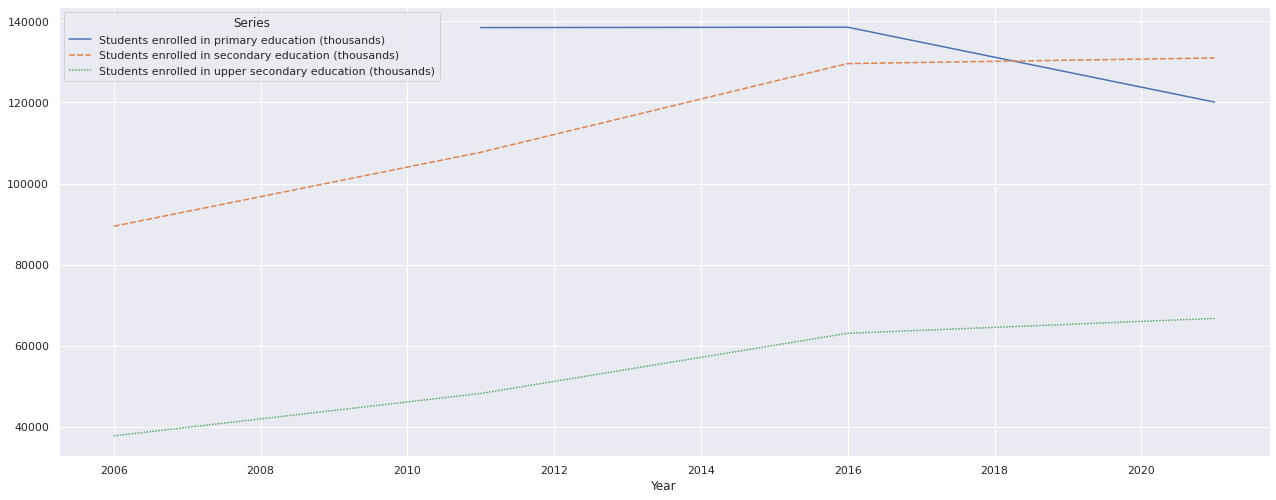

In [32]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot( data=indiaStudentsEvolutionVisualization)

In [33]:
indiaTeachersEvolutionVisualization=educationTeachingSpendingPivoted.loc['India'][['Teachers at primary level (thousands)','Teachers at secondary level (thousands)','Teachers at upper secondary level (thousands)']].resample('5Y',label='right', closed='right').mean()

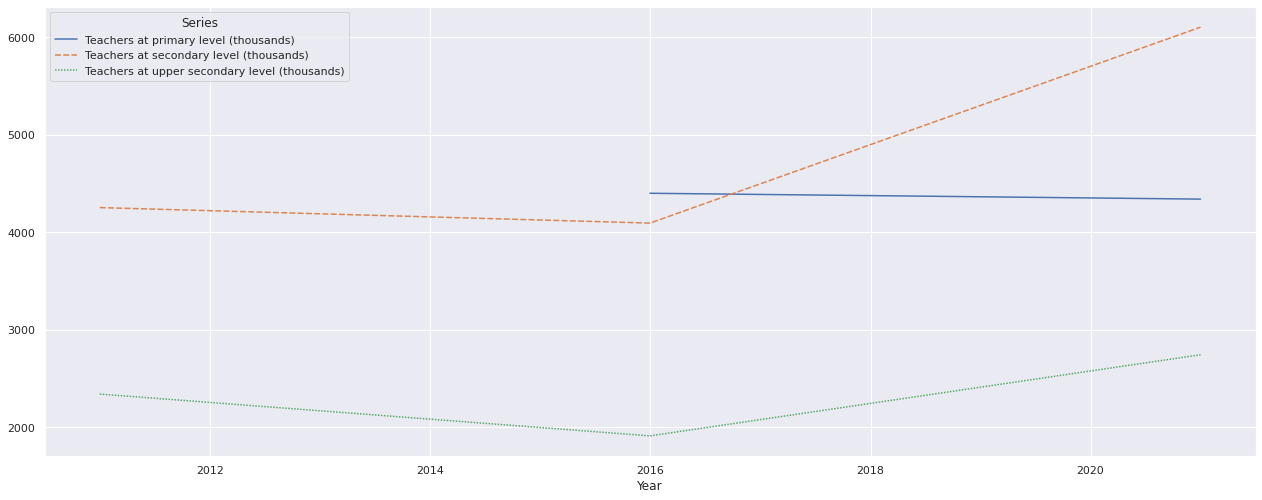

In [34]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot( data=indiaTeachersEvolutionVisualization)

### Step 5. We carry out the analysis: Evolution of education In Finland

In [35]:
educationTeachingSpendingPivoted.loc['Finland']

Series,All staff compensation as % of total expenditure in public institutions (%),Basic access to computers by level of education: Lower secondary,Basic access to computers by level of education: Primary,Basic access to computers by level of education: Upper secondary,Public expenditure on education (% of GDP),Students enrolled in primary education (thousands),Students enrolled in secondary education (thousands),Students enrolled in upper secondary education (thousands),Teachers at primary level (thousands),Teachers at secondary level (thousands),Teachers at upper secondary level (thousands)
Year,,,,,,,,,,,
2005-01-01,60.9,100.0,100.0,100.0,6.0,382.0,431.0,232.0,25.0,42.0,21.0
2010-01-01,60.3,100.0,100.0,100.0,6.5,347.0,427.0,234.0,25.0,43.0,23.0
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,42.0,22.0
2015-01-01,56.5,100.0,100.0,100.0,7.0,355.0,540.0,362.0,NaN,NaN,NaN
2017-01-01,55.1,100.0,100.0,100.0,6.4,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,369.0,546.0,365.0,NaN,NaN,NaN
2019-01-01,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,27.0,40.0,19.0


In [36]:
finlandStudentsEvolutionVisualization=educationTeachingSpendingPivoted.loc['Finland'][['Students enrolled in primary education (thousands)','Students enrolled in secondary education (thousands)','Students enrolled in upper secondary education (thousands)']].resample('5Y',label='right', closed='right').mean()

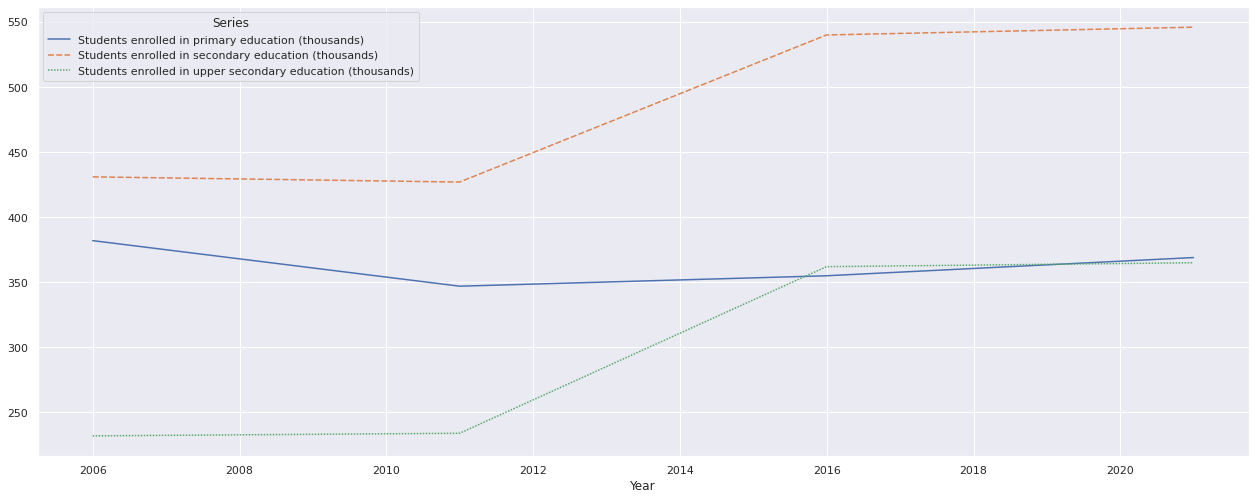

In [37]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot( data=finlandStudentsEvolutionVisualization)

In [38]:
finlandTeachersEvolutionVisualization=educationTeachingSpendingPivoted.loc['Finland'][['Teachers at primary level (thousands)','Teachers at secondary level (thousands)','Teachers at upper secondary level (thousands)']].resample('5Y',label='right', closed='right').mean()

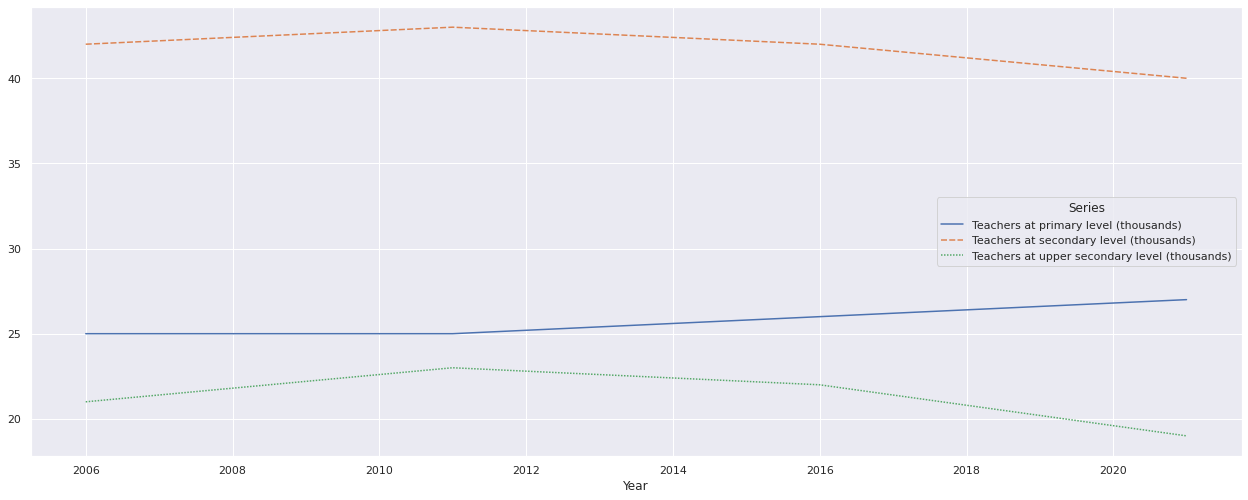

In [39]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot( data=finlandTeachersEvolutionVisualization)

## RQ 2. Impact of gender on access to education
#### Does gender play a role in the chances of receiving education ?

### Step 1. We select the metrics we need


In [40]:
educationTeachingSpending.groupby('Series').count().index

Index(['All staff compensation as % of total expenditure in public institutions (%)',
       'Basic access to computers by level of education: Lower secondary',
       'Basic access to computers by level of education: Primary',
       'Basic access to computers by level of education: Upper secondary',
       'Capital expenditure as % of total expenditure in public institutions (%)',
       'Current expenditure other than staff compensation as % of total expenditure in public institutions (%)',
       'Gross enrollment ratio - Primary (female)',
       'Gross enrollment ratio - Primary (male)',
       'Gross enrollment ratio - Secondary (female)',
       'Gross enrollment ratio - Secondary (male)',
       'Gross enrollment ratio - Upper secondary level (female)',
       'Gross enrollment ratio - Upper secondary level (male)',
       'Public expenditure on education (% of GDP)',
       'Students enrolled in primary education (thousands)',
       'Students enrolled in secondary education 

In [41]:
## We select some metrics

listOfMetrics=[
    'Gross enrollment ratio - Primary (female)',
       'Gross enrollment ratio - Primary (male)',
       'Gross enrollment ratio - Secondary (female)',
       'Gross enrollment ratio - Secondary (male)',
       'Gross enrollment ratio - Upper secondary level (female)',
       'Gross enrollment ratio - Upper secondary level (male)',
     'Public expenditure on education (% of GDP)'
       ]
                                                   
metricsSelector=educationTeachingSpending['Series'].isin(listOfMetrics)

### Step 2. We select all countries
#### initially we only need to determine if there are gender-based differences irrespective of any other factor.

In [42]:
educationTeachingSpending[metricsSelector][['Country','Year','Series','Value']]

,Country,Year,Series,Value
436,Afghanistan,2005-01-01,Gross enrollment ratio - Primary (male),123.1
437,Afghanistan,2005-01-01,Gross enrollment ratio - Primary (female),71.8
439,Afghanistan,2005-01-01,Gross enrollment ratio - Secondary (male),27.6
440,Afghanistan,2005-01-01,Gross enrollment ratio - Secondary (female),9.0
442,Afghanistan,2005-01-01,Gross enrollment ratio - Upper secondary level...,17.5
...,...,...,...,...
2776,Zambia,2017-01-01,Public expenditure on education (% of GDP),3.7
2777,Zambia,2018-01-01,Public expenditure on education (% of GDP),4.6
2778,Zimbabwe,2010-01-01,Public expenditure on education (% of GDP),1.5
2779,Zimbabwe,2014-01-01,Public expenditure on education (% of GDP),6.1


### Step 3. We pivot to produce the visualization ready DataFrame

In [43]:
## Then we pivot
educationTeachingSpendingPivoted=educationTeachingSpending[ metricsSelector][['Country','Year','Series','Value']].pivot(index=['Country','Year'], columns='Series', values='Value')

In [44]:
educationTeachingSpendingPivoted

Series                  Gross enrollment ratio - Primary (female)  \
Country     Year                                                    
Afghanistan 2005-01-01                                       71.8   
            2010-01-01                                       80.6   
            2015-01-01                                       83.5   
            2017-01-01                                        NaN   
            2018-01-01                                       82.9   
...                                                           ...   
Zambia      2018-01-01                                        NaN   
Zimbabwe    2010-01-01                                        NaN   
            2013-01-01                                      108.7   
            2014-01-01                                        NaN   
            2018-01-01                                        NaN   

Series                  Gross enrollment ratio - Primary (male)  \
Country     Year                                                  
Afghanistan 2005-01-01                                    123.1   
            2010-01-01                                    118.6   
            2015-01-01                                    122.7   
            2017-01-01                                      NaN   
            2018-01-01                                    124.2   
...                                                         ...   
Zambia      2018-01-01                                      NaN   
Zimbabwe    2010-01-01                                      NaN   
            2013-01-01                                    111.1   
            2014-01-01                                      NaN   
            2018-01-01                                      NaN   

Series                  Gross enrollment ratio - Secondary (female)  \
Country     Year                                                      
Afghanistan 2005-01-01                                          9.0   
            2010-01-01                                         33.3   
            2015-01-01                                         36.8   
            2017-01-01                                          NaN   
            2018-01-01                                         40.0   
...                                                             ...   
Zambia      2018-01-01                                          NaN   
Zimbabwe    2010-01-01                                          NaN   
            2013-01-01                                         51.3   
            2014-01-01                                          NaN   
            2018-01-01                                          NaN   

Series                  Gross enrollment ratio - Secondary (male)  \
Country     Year                                                    
Afghanistan 2005-01-01                                       27.6   
            2010-01-01                                       66.9   
            2015-01-01                                       65.9   
            2017-01-01                                        NaN   
            2018-01-01                                       70.1   
...                                                           ...   
Zambia      2018-01-01                                        NaN   
Zimbabwe    2010-01-01                                        NaN   
            2013-01-01                                       53.5   
            2014-01-01                                        NaN   
            2018-01-01                                        NaN   

Series                  Gross enrollment ratio - Upper secondary level (female)  \
Country     Year                                                                  
Afghanistan 2005-01-01                                                4.9         
            2010-01-01                                               17.8         
            2015-01-01                                               27.1   

### Step 4. We carry out the analysis: Impact of gender on Gross enrollment ratio- Primary

In [45]:
grossEnrollmentRatioPrimaryVisualization=educationTeachingSpendingPivoted[['Gross enrollment ratio - Primary (female)','Gross enrollment ratio - Primary (male)']]

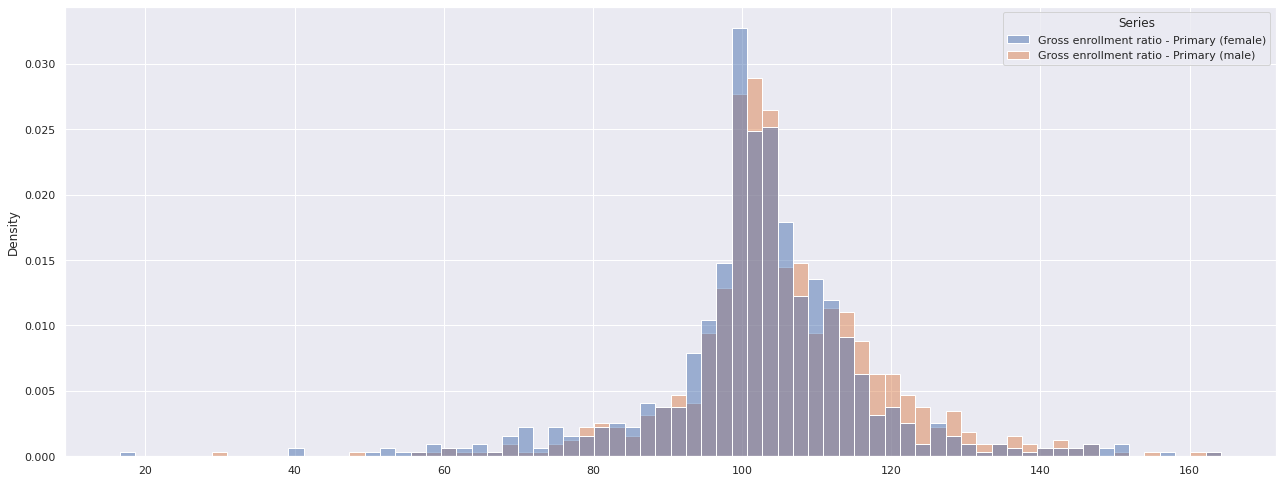

In [46]:
sns.histplot(data=grossEnrollmentRatioPrimaryVisualization,stat='density')

### Step 5. We carry out the analysis: Impact of gender on Gross enrollment ratio- Secondary

In [47]:
grossEnrollmentRatioSecondaryVisualization=educationTeachingSpendingPivoted[['Gross enrollment ratio - Secondary (female)','Gross enrollment ratio - Secondary (male)']]

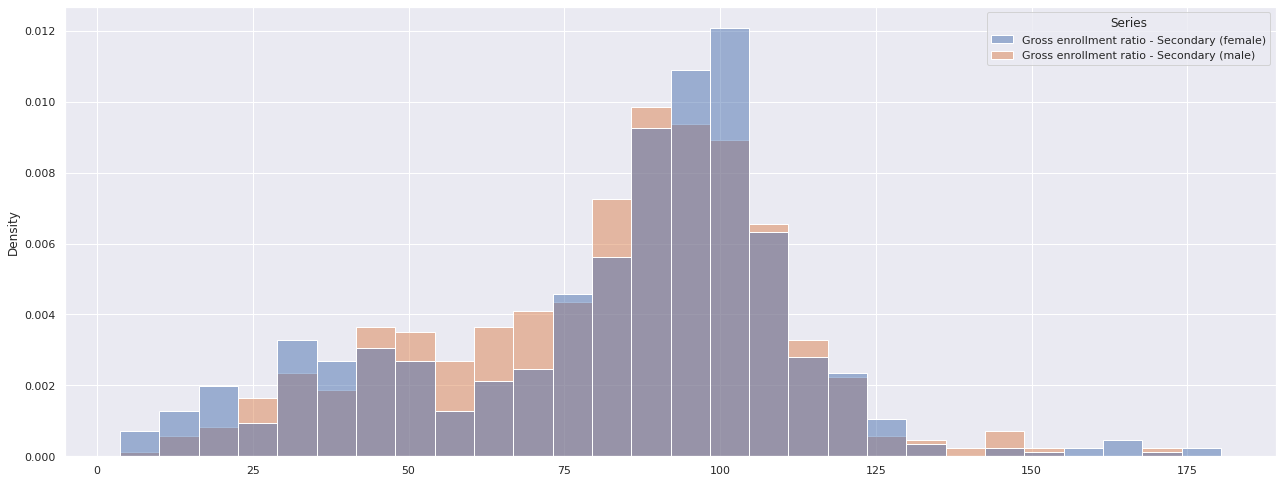

In [48]:
sns.histplot(data=grossEnrollmentRatioSecondaryVisualization,stat='density')

### Step 6. We carry out the analysis: Impact of gender on Gross enrollment ratio- Upper Secondary

In [49]:
grossEnrollmentRatioUpperSecondaryVisualization=educationTeachingSpendingPivoted[['Gross enrollment ratio - Upper secondary level (female)','Gross enrollment ratio - Upper secondary level (male)']]

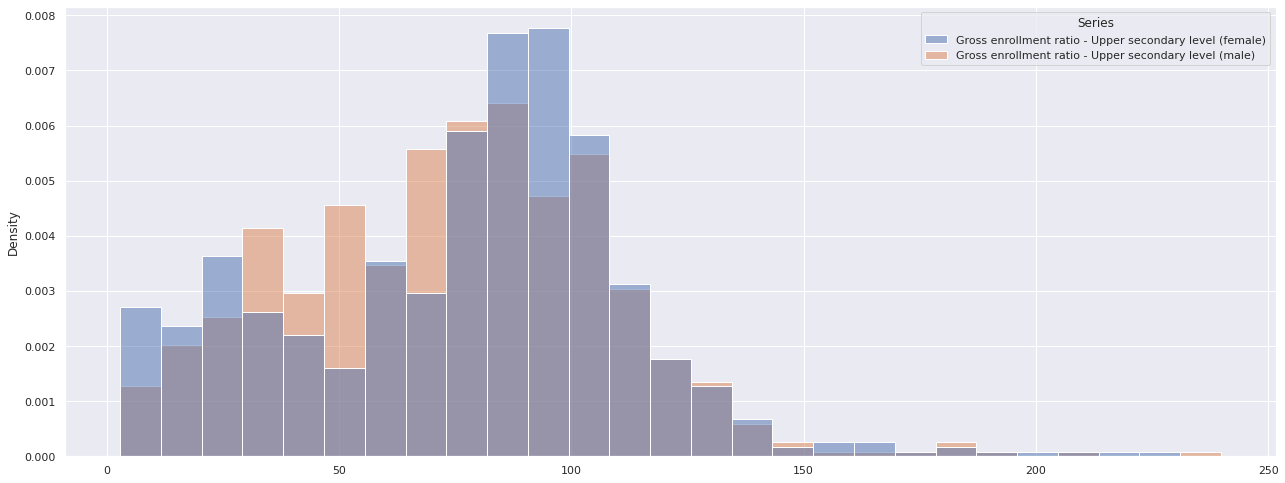

In [50]:
sns.histplot(data=grossEnrollmentRatioUpperSecondaryVisualization,stat='density')